<a href="https://colab.research.google.com/github/OKleg/CV_labs/blob/main/CV_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Загрузка изображения и преобразование цветного к полутоновому

2.   Квантование по яркости (с ручным заданием количества уровней)
3.   Бинаризация
  
  1. Бинаризация методом Оцу глобальная
  2. Бинаризация методом Оцу локальная (с предварительным разбиением на фрагменты - по каждому своя бинаризация)
  3. Бинаризация методом Оцу иерархическая (выполняется с иерархическим разбиением каждой уже полученной  области, пока возможно разбивать). Квантование с использованием найденных порогов


---



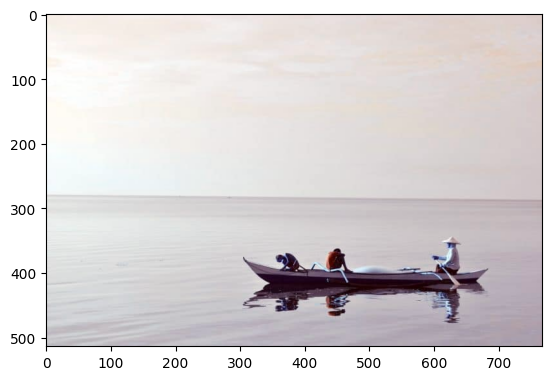

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def loading(path):
    return cv2.imread(path,cv2.IMREAD_COLOR)
img = loading("pict.jpg")
plt.imshow(img)

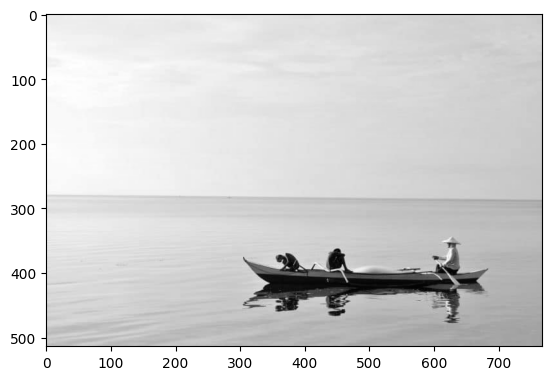

In [ ]:
def gray(img):
    gray = img.copy().astype(np.float64)
    gray = 0.3*img[:,:, 2]+0.59*img[:, :, 1]+0.11*img[:, :, 0]
    gray = (np.repeat(gray[:, :, None], 3, axis=2).astype(np.uint8))
    return gray.astype(np.uint8)
gray_img =  gray(img)
plt.imshow(gray_img)

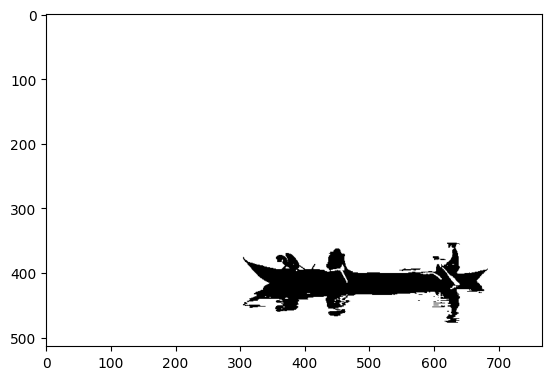

In [ ]:
ret,res = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
plt.imshow(res)

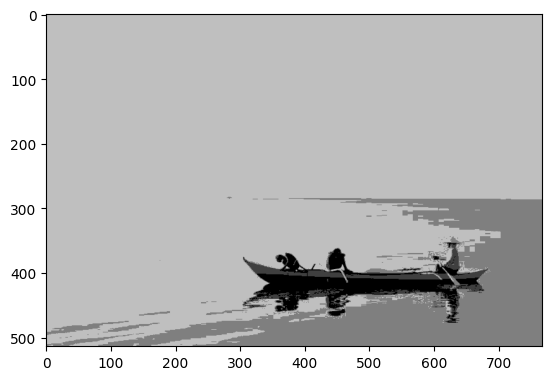

In [ ]:
def kva(input_img, count):
  img = input_img.copy()
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        for l in range(0, count):
          if ( (img[i, j][0] >= (l * 255/count)) and (img[i, j][0] <= ( (l+1) * 255/count) ) ):
            img[i, j] = np.uint8(l * 255/count)
  return img
#kva(res,3)
plt.imshow(kva(gray_img,4))

3.Бинаризация

1. Бинаризация методом Оцу глобальная
2. Бинаризация методом Оцу локальная (с предварительным разбиением на фрагменты - по каждому своя бинаризация)
3. Бинаризация методом Оцу иерархическая (выполняется с иерархическим разбиением каждой уже полученной области, пока возможно разбивать). Квантование с использованием найденных порогов

In [ ]:
def get_histogram(image, bins_num=256):
  return np.histogram(image, bins=bins_num)


def get_threshold(hist1, bin_edges, count=1):
  for l in range(1, count + 1):
    hist = hist1[:round(hist1.shape[0]/count)*l]
    # Get normalized histogram if it is required
    #if is_normalized:
    #  hist = np.divide(hist.ravel(), hist.max())

    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    #print("Otsu's algorithm implementation thresholding result: ", threshold)
    threshold = bin_mids[:-1][index_of_max_val]
    res = threshold
  return res

def threshold(image, count=1):
  res = []

    # Set total number of bins in the histogram
  bins_num = 256

    # Get the image histogram
  hist1, bin_edges = np.histogram(image[:], bins=bins_num)
  for l in range(1, count + 1):
    hist = hist1[:round(hist1.shape[0]/count)*l]
    # Get normalized histogram if it is required
    #if is_normalized:
    #  hist = np.divide(hist.ravel(), hist.max())

    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    #print("Otsu's algorithm implementation thresholding result: ", threshold)
    threshold = bin_mids[:-1][index_of_max_val]
    res.append(threshold)
  return res

In [ ]:
def osu1(input_img):
  image = input_img.copy()
  #plt.imshow(image)
  th = threshold(image)[0]
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        if ((image[i, j][0] <  th).any()):
          image[i, j] = 0
        else:
          image[i, j] = 255
  #otsu_threshold, image_result = cv2.threshold(
  #  image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
  #)
  print("Obtained threshold: ", th)
  return image
# plt.imshow(osu1("pict.jpg"))

Obtained threshold:  131.47265625


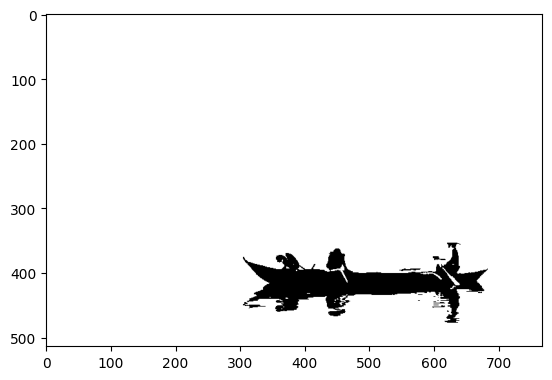

In [ ]:

plt.imshow(osu1(gray_img))

In [ ]:
def osu2(input_img, rows_count, cols_count):
  image = input_img.copy()
  #image = cv2.imread(input_img_title)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #th = threshold(image)
  row_length = image.shape[0] // rows_count
  col_length = image.shape[1] // cols_count
  for i in range(rows_count):
    for j in range(cols_count):
      image_fragment = image[i * row_length : (i + 1) * row_length, j * col_length : (j + 1) * col_length]
      osu_result = osu1(image_fragment)
      image[i * row_length : (i + 1) * row_length, j * col_length : (j + 1) * col_length] = osu_result
  # for i in range(img.shape[0]):
  #     for j in range(img.shape[1]):
  #       for l in range(0, len(th)-1):
  #         if ( (img[i, j][0] >= th[l]) and (img[i, j][0] <= th[l+1] ) ):
  #           img[i, j] = th[l]

  # print("Obtained threshold: ", th)
  return image

Obtained threshold:  227.900390625
Obtained threshold:  221.916015625
Obtained threshold:  134.267578125
Obtained threshold:  125.4296875
Obtained threshold:  127.994140625
Obtained threshold:  186.626953125


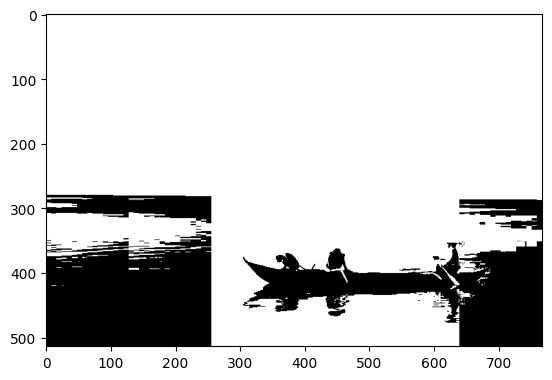

In [ ]:
plt.imshow(osu2(gray_img, 1, 6))

In [ ]:
def osu3(deep, hist1, bin_edges, thrs):
  if deep == 0:
    return
  th = int(get_threshold(hist1, bin_edges))
  print(th)
  thrs.append(th)
  osu3(deep-1, hist1[:th], bin_edges[:th+1], thrs)
  osu3(deep-1, hist1[th:], bin_edges[th:], thrs)

In [ ]:
def divide_with_thrsholds(input_image, thrs):
  image = input_image.copy()
  thrs.append(0)
  thrs.append(256)
  thrs.sort()
  for i in range(len(thrs)-1):
    image[np.logical_and(image >= thrs[i], image < thrs[i+1])] = (thrs[i] + thrs[i+1]) // 2
  return image

131
51
212
[131, 51, 212]


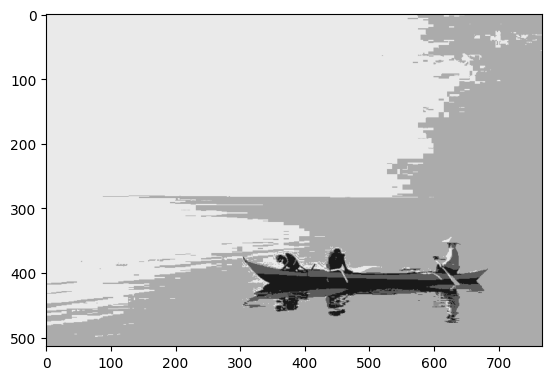

In [ ]:
hist_1, bin_edges_1 = get_histogram(gray_img)
thrs = []
osu3(2, hist_1, bin_edges_1, thrs)
print(thrs)
res_img = divide_with_thrsholds(gray_img, thrs)
plt.imshow(res_img)